<a href="https://colab.research.google.com/github/ahnjongin/deeplearning/blob/main/%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EB%94%A5%EB%9F%AC%EB%8B%9D_2%EC%9D%BC%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

선형회귀

In [1]:
x=[1,2,3,4,5,6]
y=[2,3,4,5,6,7]
x,y

([1, 2, 3, 4, 5, 6], [2, 3, 4, 5, 6, 7])

In [2]:
import numpy as np
import matplotlib.pyplot as plt

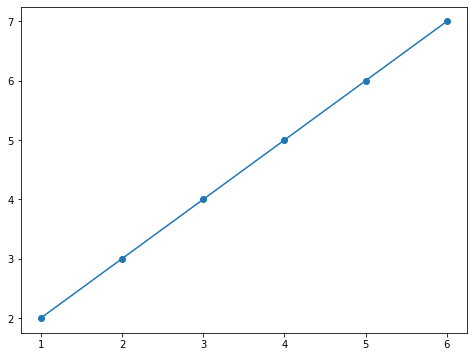

In [3]:
def Show(xs,ys):
  plt.figure(figsize=(8,6))
  plt.scatter(xs,ys)
  plt.plot(xs,ys)
  st=min(min(xs),min(ys))
  en=max(max(xs),max(ys))
  #plt.xlim(min(xs),max(ys))
  #plt.ylim(min(ys),max(ys))
Show(x,y)

In [4]:
import numpy as np
import matplotlib.pyplot as plt
data=list(range(1,10))
data

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [5]:
x=np.array(data)
y=x+1
yp=2*x+1
x,y,yp

(array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
 array([ 3,  5,  7,  9, 11, 13, 15, 17, 19]))

In [6]:
def MeanSquaredError(y,yp):
  return sum((y-yp)**2)/len(y)

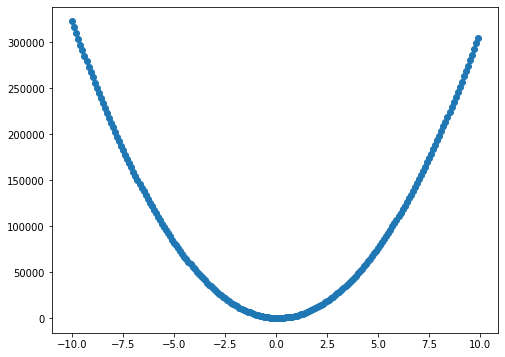

In [7]:
el=[] #학습 단계에서 오차를 기록하는 컬렉션
ws=[] #학습 단계에서 예측한 가중치 컬렉션

for w in range(-100,100):
  yp=(w+0.1)*x+1
  m=MeanSquaredError(y,yp)
  el.append(m)
  ws.append(w*0.1)
mse=np.array(el)
warr=np.array(ws)
Show(warr,mse)

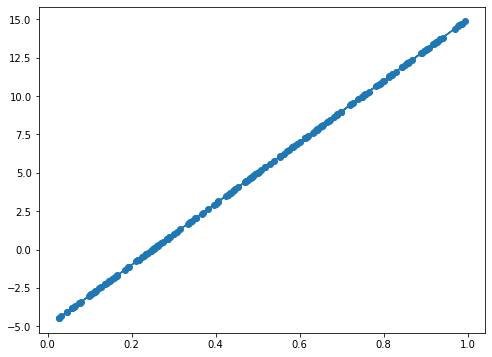

In [8]:
x=np.random.rand(200)
y=20*x-5

Show(x,y)

In [9]:
def Prediction(x,y,pred):
  plt.scatter(x,y)
  plt.scatter(x,pred)
  plt.show()

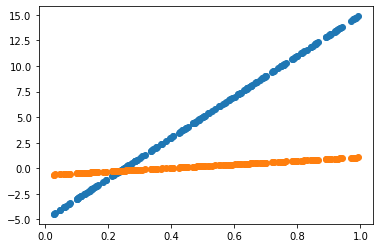

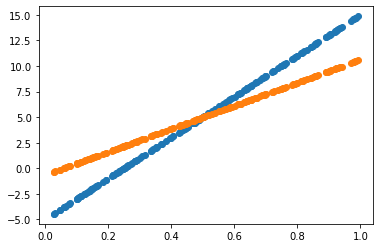

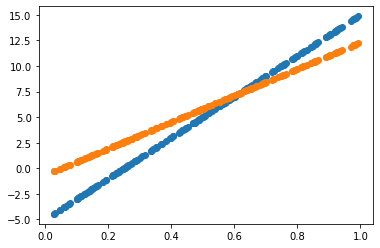

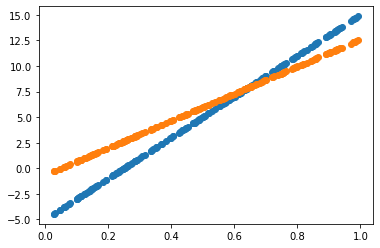

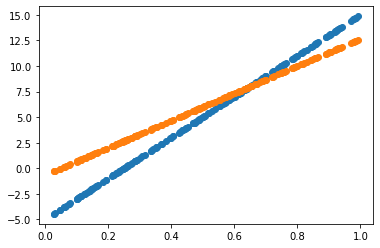

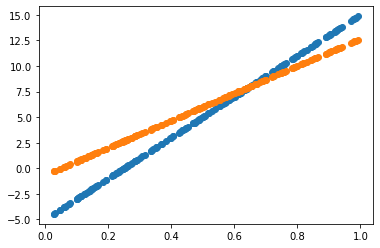

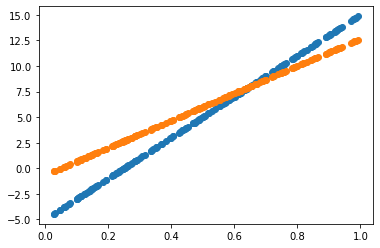

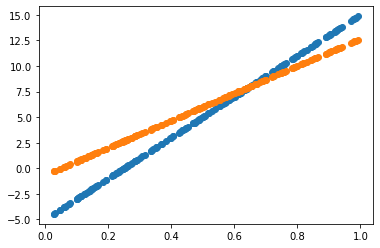

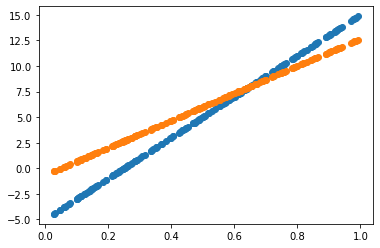

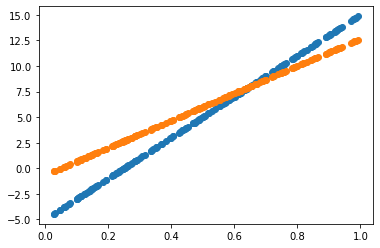

In [10]:
w=np.random.uniform(-1,1)
b=np.random.uniform(-1,1)
lr=0.5 #lr값의 크기에 따라 w와 b의 변화하는 정도를 결정
for epoch in range(100):
  yp = w * x + b
  error=np.abs(yp-y).mean()
  if error < 0.001:  #학습 도중에 good fit이면 멈춰라(원하는 수준에 도달하면)
    break
  wg=lr*((yp-y)*x).mean()
  bg=lr*(yp-y).mean()

  w=w-wg
  bg=b-bg
  if epoch %10==0:
    yp=w*x+b
    Prediction(x,y,yp)

오차제곱평균을 이용한 경사하강법 코드

 • 랜덤한 데이터 만들기


In [11]:
def make_rand_line(w,b,size,noise): #w:기울기(가중치), b:절편(편향), size:만들 크기, noise: 랜덤 정도
  x=np.random.rand(size)
  y=w*x+b #노이즈가 없는 직선에 있는 y값 생성
  yn = y + np.random.uniform(-abs(noise),abs(noise),size=y.shape) #노이즈를 가미한 y값 생성
  plt.plot(x,y,color='r',label=f'y={w}*x+{b}')
  plt.scatter(x,yn,label='real value')
  plt.show()
  return x,yn

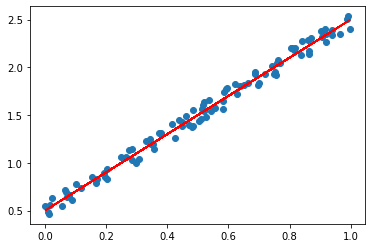

(array([0.54214822, 0.46188403, 0.96471458, 0.52183027, 0.81667285,
        0.63956781, 0.41515365, 0.33161411, 0.51266025, 0.52646591,
        0.05547636, 0.10076548, 0.99230102, 0.5915455 , 0.38062379,
        0.80726361, 0.93789036, 0.20251251, 0.98943462, 0.68662569,
        0.00142449, 0.86317229, 0.11821858, 0.01146491, 0.9970947 ,
        0.8153155 , 0.75536407, 0.65256598, 0.29664124, 0.0788168 ,
        0.15393385, 0.8604376 , 0.91541092, 0.51800481, 0.16549966,
        0.33971919, 0.43841328, 0.76939115, 0.01217136, 0.9014819 ,
        0.52093423, 0.06419594, 0.51025267, 0.53671131, 0.02434503,
        0.84086805, 0.83767512, 0.76217257, 0.26430395, 0.28551358,
        0.80416223, 0.74999515, 0.68708198, 0.35781396, 0.37435885,
        0.55534532, 0.58267501, 0.93781004, 0.07894761, 0.16978225,
        0.86215033, 0.71960795, 0.74155497, 0.27599395, 0.48455899,
        0.62900706, 0.5032835 , 0.59538394, 0.06725996, 0.19161288,
        0.75125032, 0.92069879, 0.8698713 , 0.62

In [12]:
x,y=make_rand_line(2,0.5,100,0.1)
x,y

In [13]:
w=np.random.uniform(-1.0,1.0)
b=np.random.uniform(-1.0,1.0)
w,b

(-0.35109088647692777, -0.6267946274238034)

In [14]:
yh=w*x+b
error=(yh-y)**2
epochs=500
lr=0.5
errors=[] #학습 과정에서 오차의 정도를 기억할 컬렉션

for epoch in range(epochs):
  yh=x*w+b #학습
  error=((yh-y)**2).mean() #MeanSquaredError
  if error < 0.0005: #원하는 수준의 오차에 도달하면
    break #학습을 멈춰라

  w=w-lr*((yh-y)*x).mean()
  b=b-lr*(yh-y).mean()


  errors.append(error)

  if epoch%10==0:
    print(f"{epoch:4} w={w:8}, b={b:10}, error={error:10}")




   0 w=0.3376389235929065, b=0.5385852635033876, error=5.884828250507008
  10 w=1.0615224848231117, b=1.017322302752274, error=0.08079017321321132
  20 w=1.3203836044962824, b=0.8766238117136859, error=0.04401998514166945
  30 w=1.507619238664295, b=0.7748317024835103, error=0.024780825346299554
  40 w=1.6430551017228394, b=0.7012009409016575, error=0.01471437277890524
  50 w=1.7410218863918097, b=0.6479405355554877, error=0.009447330539566555
  60 w=1.8118856198346214, b=0.6094149150580893, error=0.006691470541692556
  70 w=1.8631445106354378, b=0.581547619924627, error=0.005249529508609904
  80 w=1.9002223466240038, b=0.5613899656667822, error=0.0044950666750510635
  90 w=1.9270423948169524, b=0.5468090376207411, error=0.004100311165524618
 100 w=1.9464425287755232, b=0.5362620037266017, error=0.0038937643279999407
 110 w=1.960475508690505, b=0.5286328649219337, error=0.0037856933953291775
 120 w=1.9706261873257565, b=0.5231143694392151, error=0.0037291477390107497
 130 w=1.977968624

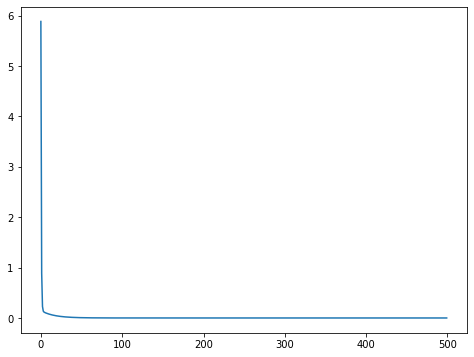

In [15]:
plt.figure(figsize=(8,6))
plt.plot(errors)
plt.show()

독립 변수가 여러 개 있을 때 가중치와 편향 구하기

In [16]:
x1=np.random.rand(100)
x2=np.random.rand(100)
x3=np.random.rand(100)
x1,x2,x3

(array([0.75901682, 0.50578164, 0.70888774, 0.24153605, 0.32625114,
        0.32536057, 0.44456014, 0.97200299, 0.44498122, 0.15463147,
        0.95451648, 0.9896921 , 0.06998912, 0.60993031, 0.94724905,
        0.98332469, 0.45000389, 0.98890381, 0.01856568, 0.35933036,
        0.08372814, 0.90099022, 0.92857636, 0.81409149, 0.68823859,
        0.65986148, 0.53821241, 0.20779314, 0.78795743, 0.48819887,
        0.56536526, 0.21996488, 0.44046788, 0.09660441, 0.4115452 ,
        0.34657316, 0.91424222, 0.68131807, 0.8778084 , 0.07013079,
        0.04707603, 0.82161387, 0.40808893, 0.53379835, 0.12572084,
        0.44171003, 0.49481967, 0.24412388, 0.42208684, 0.47885603,
        0.62469156, 0.7122623 , 0.70903604, 0.53604289, 0.3792261 ,
        0.95826922, 0.60836952, 0.93242935, 0.56591136, 0.71364031,
        0.14568975, 0.56728681, 0.39453865, 0.73768627, 0.42568961,
        0.24782732, 0.97382382, 0.69115299, 0.45331801, 0.74993978,
        0.68455519, 0.52040986, 0.74031959, 0.32

In [17]:
w1= np.random.uniform(-1,1)
w2= np.random.uniform(-1,1)
w3= np.random.uniform(-1,1)

b= np.random.uniform(-1,1)
w1,w2,w3,b

(0.28693075906100396,
 -0.039098792517352265,
 -0.705108710880431,
 -0.7941288874466934)

In [27]:
y=0.5*x1 + 0.7*x2 - 0.2*x3 + 0.6
y

array([0.87453566, 0.75640339, 1.37796626, 0.55061134, 0.72697898,
       0.82088146, 0.75694706, 1.55919211, 1.24438947, 1.01158596,
       1.2087524 , 1.26228733, 0.87616138, 0.80312675, 1.40757523,
       1.33039041, 0.78526371, 1.68661182, 0.91292404, 1.42366106,
       1.07761921, 1.47221517, 1.3470526 , 1.07550717, 1.10120619,
       0.95868393, 1.12379735, 0.67944105, 1.49877607, 1.40223687,
       1.00534125, 1.14146205, 0.79260741, 0.91911672, 0.77586539,
       1.24530171, 1.04836689, 1.54792391, 0.87032538, 1.1063042 ,
       0.9079878 , 1.54197206, 1.11999531, 0.75323313, 0.90199165,
       0.87079218, 0.89045455, 1.18979877, 1.16923081, 1.04864181,
       1.1086885 , 1.03648119, 1.27514097, 1.15103676, 0.76461938,
       1.51604362, 1.30974656, 1.1093014 , 0.97198618, 1.43392368,
       0.74211855, 1.55969341, 1.11553624, 0.78660825, 0.8018591 ,
       1.25890186, 1.44939027, 0.98845683, 1.23839104, 1.25670093,
       1.03340222, 0.91684034, 1.51074063, 1.07703017, 1.11344

In [28]:
errors = [] #예측에 따른 오차를 보관할 컬렉션
w1s=[]  #x1의 가중치 컬렉션
w2s=[]  #x2의 가중치 컬렉션
w3s=[]  #x3의 가중치 컬렉션

In [29]:
epochs=10000
lr=0.02

In [30]:
for epoch in range(epochs): #학습 Loop
  yh = w1 *x1 + w2 *x2 + w3 *x3 + b #예측(학습)
  error = ((yh-y)**2).mean() #MeanSquaredError
  if error<0.0001: #원하는 오차 범위에 도달하면
    break #학습을 종료
  w1 = w1 - lr*((yh-y)*x1).mean() #변화를 준다.(경사 하강)
  w2 = w2 - lr*((yh-y)*x2).mean() #변화를 준다.(경사 하강)
  w3 = w3 - lr*((yh-y)*x3).mean() #변화를 준다.(경사 하강)

  b = b - lr*(yh-y).mean() #변화를 준다.(경사 하강)


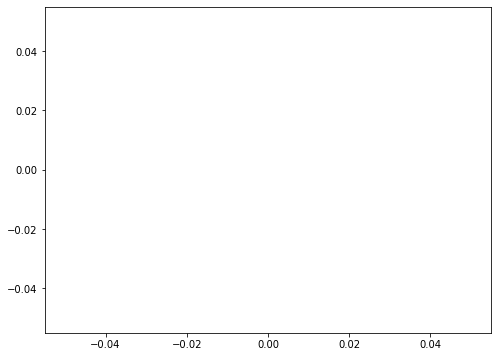

In [31]:
plt.figure(figsize=(8,6))
plt.plot(errors)

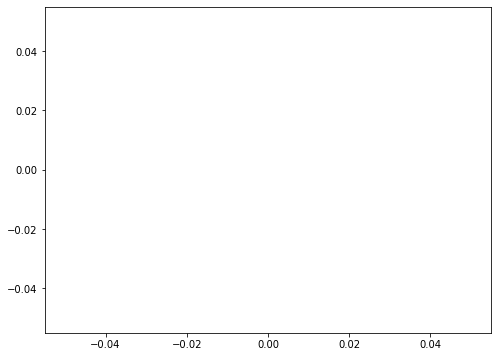

In [32]:
plt.figure(figsize=(8,6))
plt.plot(w1s,color='r')
plt.show()

사이킷 런의 선형 회귀 모델-경사하강법 적용

In [33]:
x1,x2,x3

(array([0.75901682, 0.50578164, 0.70888774, 0.24153605, 0.32625114,
        0.32536057, 0.44456014, 0.97200299, 0.44498122, 0.15463147,
        0.95451648, 0.9896921 , 0.06998912, 0.60993031, 0.94724905,
        0.98332469, 0.45000389, 0.98890381, 0.01856568, 0.35933036,
        0.08372814, 0.90099022, 0.92857636, 0.81409149, 0.68823859,
        0.65986148, 0.53821241, 0.20779314, 0.78795743, 0.48819887,
        0.56536526, 0.21996488, 0.44046788, 0.09660441, 0.4115452 ,
        0.34657316, 0.91424222, 0.68131807, 0.8778084 , 0.07013079,
        0.04707603, 0.82161387, 0.40808893, 0.53379835, 0.12572084,
        0.44171003, 0.49481967, 0.24412388, 0.42208684, 0.47885603,
        0.62469156, 0.7122623 , 0.70903604, 0.53604289, 0.3792261 ,
        0.95826922, 0.60836952, 0.93242935, 0.56591136, 0.71364031,
        0.14568975, 0.56728681, 0.39453865, 0.73768627, 0.42568961,
        0.24782732, 0.97382382, 0.69115299, 0.45331801, 0.74993978,
        0.68455519, 0.52040986, 0.74031959, 0.32

In [34]:
#모델에서 학습할 수 있는 구조로 데이터 구조를 수정하기
x1r = x1.reshape(-1,1)  #100x1
x2r = x2.reshape(-1,1)  #100x1
x3r = x3.reshape(-1,1)  #100x1
x1r,x2r,x3r
XD = np.concatenate([x1r,x3r,x3r],axis=1) #100x3
XD.shape
XD

array([[0.75901682, 0.62625611, 0.62625611],
       [0.50578164, 0.49420497, 0.49420497],
       [0.70888774, 0.82920879, 0.82920879],
       [0.24153605, 0.97960981, 0.97960981],
       [0.32625114, 0.89724824, 0.89724824],
       [0.32536057, 0.86499511, 0.86499511],
       [0.44456014, 0.91534769, 0.91534769],
       [0.97200299, 0.15918067, 0.15918067],
       [0.44498122, 0.68233684, 0.68233684],
       [0.15463147, 0.13569731, 0.13569731],
       [0.95451648, 0.14123243, 0.14123243],
       [0.9896921 , 0.49660714, 0.49660714],
       [0.06998912, 0.26637791, 0.26637791],
       [0.60993031, 0.81742691, 0.81742691],
       [0.94724905, 0.01406952, 0.01406952],
       [0.98332469, 0.47753678, 0.47753678],
       [0.45000389, 0.64874875, 0.64874875],
       [0.98890381, 0.15871672, 0.15871672],
       [0.01856568, 0.53092319, 0.53092319],
       [0.35933036, 0.18215829, 0.18215829],
       [0.08372814, 0.47985417, 0.47985417],
       [0.90099022, 0.02394391, 0.02394391],
       [0.

In [35]:
from sklearn.linear_model import SGDRegressor #사이킷 런의 선형 모델 중에 경사하강법을 적용한 모델 사용하기 위함

In [36]:
#모델 생성
mc = SGDRegressor(max_iter=5000, tol=0.0001, eta0=0.01)

In [37]:
#학습
mc.fit(XD,y)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=5000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [38]:
mc.coef_[0],mc.coef_[1],mc.coef_[2],mc.intercept_[0]

(0.497497436849507,
 0.003506110406327159,
 0.003506110406327159,
 0.8149597740187283)

사이킷 런의 svm.SVC- 머신러닝을 시작합시다.

In [39]:
from sklearn import svm #모듈 임포트

In [40]:
#학습에 사용할 데이터
X = [[1],[2],[4],[8],[6],[9],[10],[12]]
L = [3,5,9,17,13,19,21, 25]
#테스트 데이터
XT= [[5],[7]]

In [41]:
mc2 = svm.SVC() #모델 생성
mc2.fit(X,L) #학습
res=mc2.predict(XT) #맞춰봐
res


array([13, 17])

고생 좀 해서 만드는 퍼셉트론 이해하기

In [42]:
#두 개의 독립 변수를 갖고 하나의 결과에 수렴하는 간단한 문제를 판별하는 모델 내부 이해하기
#라이브러리 없이 퍼셉트론 만들기

#판별식: w1*x1+w2*x2+b=0
w1,w2,b=0,0,0 #w1,w2, b 0이라고 가정

def setwb(wt1,wt2,bt): #특정 가중치와 편향(임계치)로 설정하기
  global w1,w2,b
  w1,w2,b= wt1,wt2, bt
def discriminate(x1,x2):  #판별식
  if(w1*x1+w2*x2+b <=0):  #판별식보다 아래에 있을 때(판별식 상에 있을 때 포함)
    return 0
  else:  #판별식보다 위에 있을 때
    return 1

def test(ds,wt1,wt2,bt):  #테스트 케이스
  setwb(wt1,wt2,b)  #전달받은 값으로 가중치와 편향을 설정
  ok, total = 0,0
  for x1,x2,y in ds:
    if(discriminate(x1,x2)==y): #판별식을 적용했을 때 원하는 결과가 나온다면
      ok+=1
    total+=1
  return ok/total #정답률을 반환

#range와 비슷하게 동작하는 함수(실수 범위에서 실수 step으로 생성)
#0, 0.1, 0.2, 0.3, 0.4, 0.5 처럼 실수 range를 만들어 주는 함수
def myr(s,e,st):  #s: 범위 시작, e: 범위 끝, st: 변화폭(step)
  r= s
  while(r<e):
    yield r
    r += st

#기계 학습-모델의 fit과 같은 역할을 하는 함수
def find_wb(ds):
  for wt1 in myr(-1,1,0.1):  #-1에서 1까지 0.1씩 증가시켜 가면서 반복하시오
    for wt2 in myr(-1,1,0.1):  #-1에서 1까지 0.1씩 증가시켜 가면서 반복하시오
      for bt in myr(-1,1,0.1):  #-1에서 1까지 0.1씩 증가시켜 가면서 반복하시오
        if(test(ds,wt1,wt2,bt)==1.0):  #100점을 받았다면
          return True  #정답을 찾았음
  return False  #정답을 구하지 못했음

ds_or=[[0,0,0],[0,1,1],[1,0,1],[1,1,1]]
res= find_wb(ds_or)
res,w1,w2,b

(True, 0.09999999999999987, 0.09999999999999987, 0)

온라인 상에 제공하는 머신러닝에 사용할 데이터 로딩하기

In [43]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

(x_train, y_train),(x_test,y_test)= keras.datasets.mnist.load_data()
x_train.shape, y_train.shape, x_test.shape, y_test.shape

11493376/11490434 [==============================] - 0s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [44]:
#모델에서 사용이 가능하게 데이터를 정제화
#y값을 카테고리컬 데이터로 변형
#3-> [0,0,0,1,0,0,0,0,0] #3은 0일 확률0 %, 1일 확률 0%, 3일 확률 100%..
from keras.utils import np_utils
y_train2 = np_utils.to_categorical(y_train)
y_train,y_train2

(array([5, 0, 4, ..., 5, 6, 8], dtype=uint8),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.]], dtype=float32))

In [45]:
y_test2=np_utils.to_categorical(y_test)
y_test, y_test2

(array([7, 2, 1, ..., 4, 5, 6], dtype=uint8),
 array([[0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32))

In [53]:
#28*28구조의 이미지를 784*1의 구조로 변환
x_train2= x_train.reshape(-1,28*28)
x_test2= x_test.reshape(-1,28*28)
x_train2,x_train,x_test2, x_test

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0

In [54]:
x_train3=x_train2/255.0 #수치를 0~1.0사이의 수로 변환
x_test3=x_test2/255.0 #수치를 0~1.0사이의 수로 변환

In [55]:
from keras import layers,models

In [56]:
#모델 생성
model = keras.models.Sequential()
[ ]
#계층 추가
model.add(keras.layers.Dense(100,activation="relu",input_shape=(784,)))
model.add(layers.Dense(28,activation="relu"))
model.add(layers.Dense(10,activation='softmax'))
[ ]
#모델 컴파일
model.compile(loss ='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [57]:
#학습
model.fit(x_train3,y_train2,epochs=15)

Epoch 1/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2700 - accuracy: 0.9219
Epoch 2/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1188 - accuracy: 0.9639
Epoch 3/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0837 - accuracy: 0.9745
Epoch 4/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0631 - accuracy: 0.9804
Epoch 5/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0511 - accuracy: 0.9839
Epoch 6/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0425 - accuracy: 0.9862
Epoch 7/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0345 - accuracy: 0.9887
Epoch 8/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0287 - accuracy: 0.9905
Epoch 9/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0247 - accuracy: 0.9922
Epoch 10/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.021

In [58]:
#학습한 것을 토대로 잘 학습했는지 평가
score=model.evaluate(x_test3,y_test2)
score

313/313 [==============================] - 1s 1ms/step - loss: 0.0994 - accuracy: 0.9780


[0.09944011270999908, 0.9779999852180481]